In [2]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
#reading the dataset
data = pd.read_csv('D:/newai/Data Analysis Project/FitBit Fitness Tracker Data/dailyActivity_merged.csv')

In [4]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# Preprocessing the Data

In [5]:
data.Id.nunique()

33

In [6]:
#we here focus on totalsteps and minutes and it's relationship with calories burned. 
#we will remove the unnecessary columns
import_columns = ['Id', 'ActivityDate', 'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

In [7]:
data = data[import_columns]

In [8]:
data.head()

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863


In [9]:
#rename column ActivityDate to Date
data.rename(columns={'ActivityDate' : 'Date'}, inplace=True)

In [10]:
data.head()

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863


In [11]:
data['TotalMinutes'] = data.VeryActiveMinutes + data.FairlyActiveMinutes + data.LightlyActiveMinutes + data.SedentaryMinutes

In [12]:
data['TotalHours'] = round(data.TotalMinutes / 60)

In [13]:
data.head()

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094,18.0
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033,17.0
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998,17.0
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040,17.0


In [14]:
#take an overview about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    940 non-null    int64  
 1   Date                  940 non-null    object 
 2   TotalSteps            940 non-null    int64  
 3   VeryActiveMinutes     940 non-null    int64  
 4   FairlyActiveMinutes   940 non-null    int64  
 5   LightlyActiveMinutes  940 non-null    int64  
 6   SedentaryMinutes      940 non-null    int64  
 7   Calories              940 non-null    int64  
 8   TotalMinutes          940 non-null    int64  
 9   TotalHours            940 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 73.6+ KB


In [15]:
#convert the Date column to datetime type not object

data.Date = pd.to_datetime(data.Date)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    940 non-null    int64         
 1   Date                  940 non-null    datetime64[ns]
 2   TotalSteps            940 non-null    int64         
 3   VeryActiveMinutes     940 non-null    int64         
 4   FairlyActiveMinutes   940 non-null    int64         
 5   LightlyActiveMinutes  940 non-null    int64         
 6   SedentaryMinutes      940 non-null    int64         
 7   Calories              940 non-null    int64         
 8   TotalMinutes          940 non-null    int64         
 9   TotalHours            940 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 73.6 KB


In [17]:
data.head()

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0


In [18]:
data['Day_Of_Week'] = data.Date.dt.day_name()

In [19]:
data.head()

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,Day_Of_Week
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0,Saturday


In [20]:
#here we see if there's null data
data.isnull().sum()

Id                      0
Date                    0
TotalSteps              0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
TotalMinutes            0
TotalHours              0
Day_Of_Week             0
dtype: int64

In [21]:
#check about duplicated rows
data.duplicated().sum()

0

# Analysis and Visualization

In [22]:
data.describe(include='all')

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,Day_Of_Week
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830,NaN
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,NaN
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000,NaN
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000,NaN
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000,NaN
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000,NaN


we can notice from the TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, and LightlyActiveMinutes Columns that most people do not practice sports because the big difference between Total steps and active steps

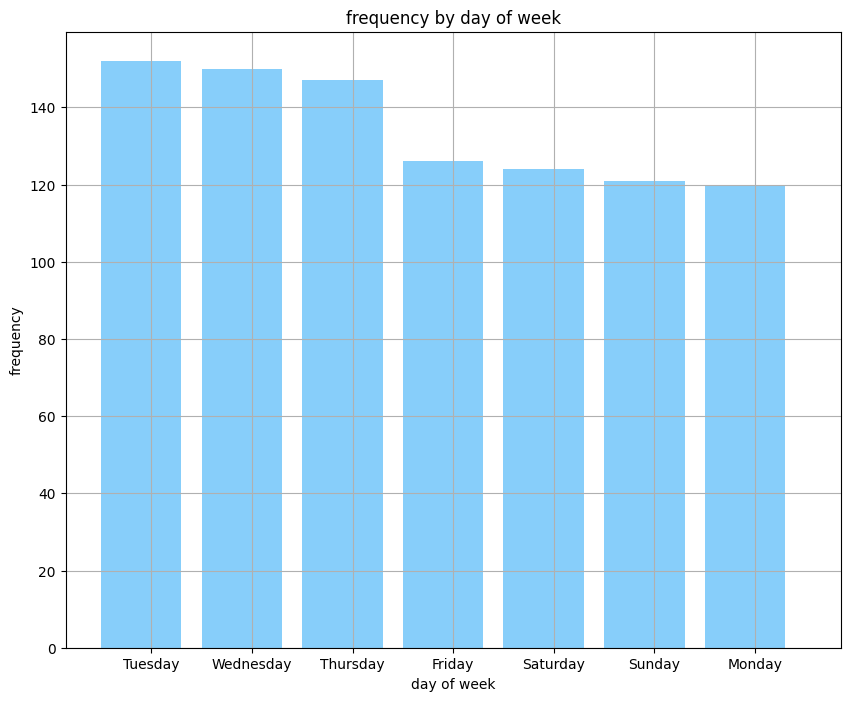

In [23]:
plt.figure(figsize=(10, 8))
plt.hist(data.Day_Of_Week, bins=np.arange(-0.5, 7.5, 1), color='lightskyblue', width=0.8);
plt.grid(True)
plt.xticks(np.arange(0, 7,1))
plt.xlabel('day of week')
plt.ylabel('frequency')
plt.title('frequency by day of week');

We notice that people are very active in tuesday, wednesday, and thursday, so we can send motivation message for people in the other days

In [24]:
# Define the Numerical Values to find the relationship between these columns and the calories column
df = data.select_dtypes(include='number')
df.corr()

,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
Id,1.000000,0.185721,0.303608,0.051158,-0.098754,-0.043319,0.396671,-0.048274,-0.048140
TotalSteps,0.185721,1.000000,0.667079,0.498693,0.569600,-0.327484,0.591568,-0.017285,-0.018152
VeryActiveMinutes,0.303608,0.667079,1.000000,0.312420,0.051926,-0.164671,0.615838,-0.018244,-0.021064
FairlyActiveMinutes,0.051158,0.498693,0.312420,1.000000,0.148820,-0.237446,0.297623,-0.094155,-0.094941
LightlyActiveMinutes,-0.098754,0.569600,0.051926,0.148820,1.000000,-0.437104,0.286718,-0.067049,-0.066640
SedentaryMinutes,-0.043319,-0.327484,-0.164671,-0.237446,-0.437104,1.000000,-0.106973,0.915243,0.914539
Calories,0.396671,0.591568,0.615838,0.297623,0.286718,-0.106973,1.000000,0.094951,0.093314
TotalMinutes,-0.048274,-0.017285,-0.018244,-0.094155,-0.067049,0.915243,0.094951,1.000000,0.998963
TotalHours,-0.048140,-0.018152,-0.021064,-0.094941,-0.066640,0.914539,0.093314,0.998963,1.000000


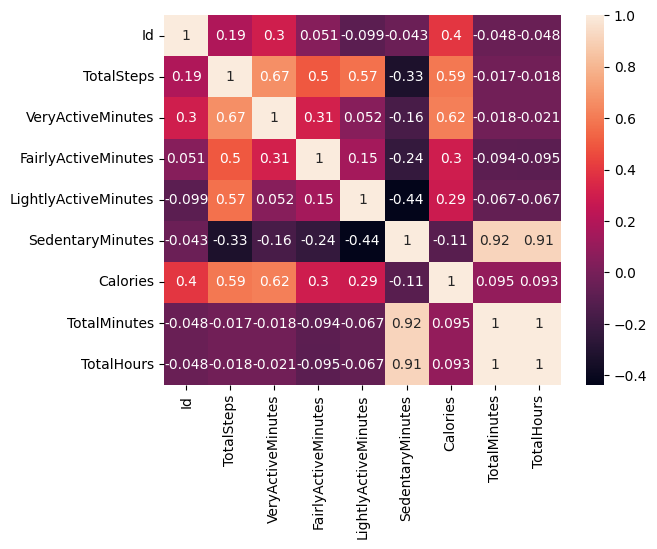

In [25]:
# Here we display the corr between all columns
sns.heatmap(df.corr(), annot=True);

from the heatmap we can notice that the TotalSteps and VeryActiveMintues Columns have the highest influence on the Calories column

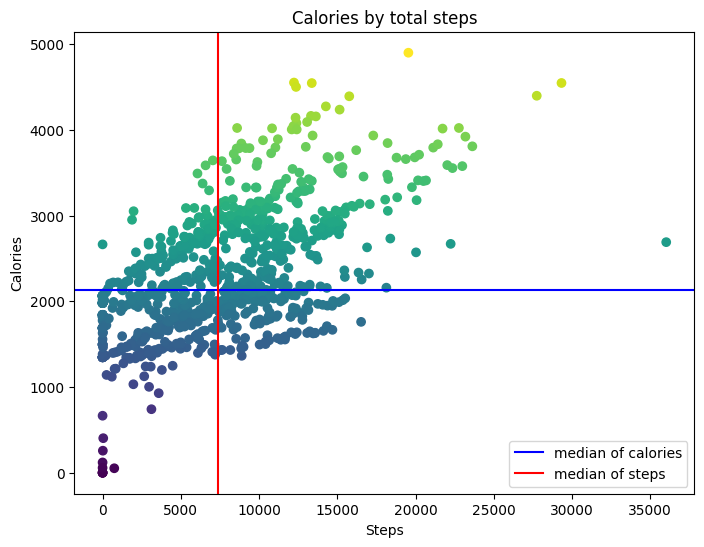

In [26]:
# Visualize the relationship between the TotalSteps column and the Calories column
plt.figure(figsize=(8, 6))
plt.scatter(data.TotalSteps, data.Calories, c=data.Calories)

median_steps = 7405
median_calories = 2134

plt.axhline(median_calories, color='blue', label='median of calories')
plt.axvline(median_steps, color='red', label='median of steps')
plt.legend()

plt.xlabel('Steps')
plt.ylabel('Calories')
plt.title('Calories by total steps');

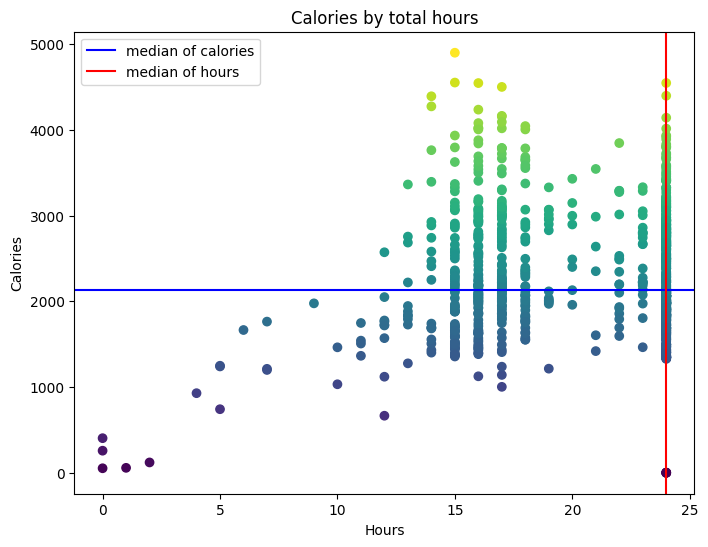

In [27]:
# Visualize the relationship between the TotalHours column and the Calories column
plt.figure(figsize=(8, 6))
plt.scatter(data.TotalHours, data.Calories, c=data.Calories)

median_hours = 24
median_calories = 2134

plt.axhline(median_calories, color='blue', label='median of calories')
plt.axvline(median_hours, color='red', label='median of hours')
plt.legend()

plt.xlabel('Hours')
plt.ylabel('Calories')
plt.title('Calories by total hours');

we notice that there is a weak relationship between them, and I think this happened because the few number of active minutes

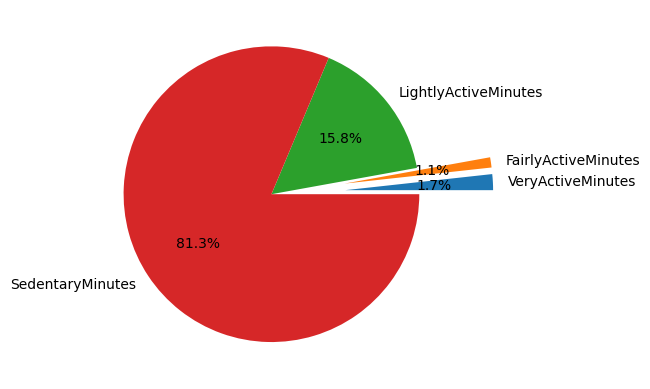

In [28]:
# Visualize the percentage of each column of these columns {VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes}
VeryActiveMinutes = data.VeryActiveMinutes.sum()
FairlyActiveMinutes = data.FairlyActiveMinutes.sum()
LightlyActiveMinutes = data.LightlyActiveMinutes.sum()
SedentaryMinutes = data.SedentaryMinutes.sum()

Minutes = [VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes]
Labels = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

plt.pie(Minutes, labels=Labels, autopct='%1.1f%%', explode=[0.5, 0.5, 0, 0]);

We can say that most people use the company's products to calculate calories burned in normal daily activities such as walking to the market or to the bus stop, etc., and not sports activities such as running.

****

Conclusion: 81 percent of users use the program to calculate calories burned in normal daily activities, and they are also very active in the middle and end of the week

***